<a href="https://colab.research.google.com/github/amuhirwa/Water-Quality-Model/blob/main/Ndizeye_Lesly_Quality_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#imports
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
# 1. Load the data
path = kagglehub.dataset_download("uom190346a/water-quality-and-potability")
df = pd.read_csv(f"{path}/water_potability.csv")

Plot the Data Appropriately

In [20]:
# 2. Handle missing values with (mean imputation)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

Split features

In [21]:
# 3. Split features and target
X = df_imputed.drop("Potability", axis=1)
y = df_imputed["Potability"]

In [22]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=72)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Each Memeber Defines their model Here

In [24]:
def model_lesly():
    model = Sequential([
        Dense(96, input_shape=(9,), activation='relu', kernel_regularizer=l2(0.005)),
        Dropout(0.4),
        Dense(48, activation='relu', kernel_regularizer=l2(0.005)),
        Dropout(0.3),
        Dense(24, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=AdamW(learning_rate=0.003),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Start the training Process

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.676, Test: 0.678
[0.5939885377883911, 0.6164122223854065, 0.6254770755767822, 0.6440839767456055, 0.6655534505844116, 0.6674618124961853, 0.6693702340126038, 0.6717557311058044, 0.6684160232543945, 0.6679389476776123, 0.6789122223854065, 0.6855915784835815, 0.6688931584358215, 0.6731870174407959, 0.6731870174407959]


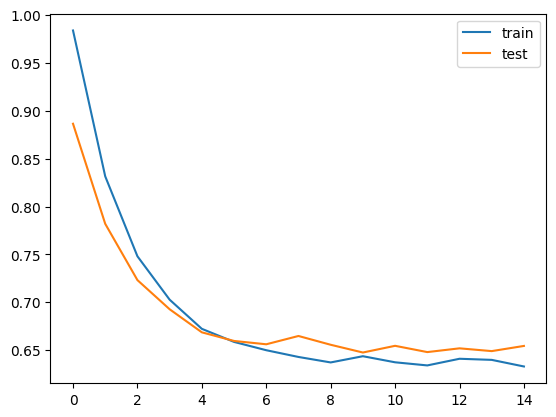

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.6784
F1 Score: 0.4433
Precision: 0.6829
Recall: 0.3281


In [34]:

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_accuracy',
    patience=8,
    restore_best_weights=True
)

model = model_lesly()
history = model.fit(
    X_train_scaled, y_train,
    epochs=4000,
    batch_size=64,
    validation_split=0.2,
    callbacks=[es],
    verbose=0
)

# evaluating the model
_, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
print(history.history['accuracy'])
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

y_pred_nn = model.predict(X_test_scaled)
y_pred_classes = (y_pred_nn > 0.5).astype(int)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)

# summary viewer
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")